# Sensor Performance
A notebook to test performance of various lick sensors needed for the physical setup.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Capacitive sensor
The Arduino `Serial` library sends ASCII-encoded byte data via the `print` function. By sending a new line (`\n`) byte after every value (or using `Serial.println` instead), we can load the data via `np.loadtxt`.

### Test trace

#### Load data

In [2]:
# Load data into numpy array
data_filepath = '../data/test.log'
data = np.loadtxt(data_filepath, dtype=np.float32)

In [3]:
# Verify ASCII encoding/decoding
with open(data_filepath, 'rb') as f:
    print(f.read(20*2))
print(data[:20])

b'0\n0\n0\n0\n5\n4\n2\n4\n4\n1\n4\n4\n1\n4\n4\n4\n7\n4\n4\n4\n'
[0. 0. 0. 0. 5. 4. 2. 4. 4. 1. 4. 4. 1. 4. 4. 4. 7. 4. 4. 4.]


#### Plot test trace

In [4]:
# Find sensor crossing thresholds
thresh = 200
gt = data > thresh
lt = data < thresh
is_lick = np.logical_and(gt, np.roll(lt, 1))
is_lick[0] = False
t_lick = np.argwhere(is_lick)

Text(0, 0.5, 'sensor value (a.u.)')

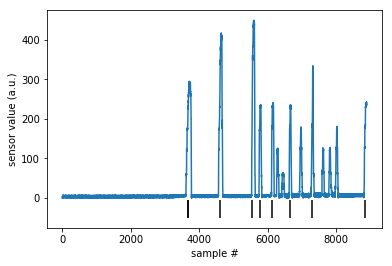

In [12]:
fig, ax = plt.subplots()
ax.plot(data)
ax.vlines(t_lick, ymin=-50.0, ymax=-5.0)
#ax.set_ylim([-0.10*thresh, 3*thresh])
ax.set_xlabel('sample #')
ax.set_ylabel('sensor value (a.u.)')

### Compare recorded trace

In [49]:
import moviepy as mpy
import moviepy.editor
import numpy as np
from IPython.display import clear_output
import math
import matplotlib.pyplot as plt

In [90]:
video_filename = '/home/james/Desktop/lick_movies/test_insulation_26-06-19.mov'

height = 1080
width = 1080

clip = mpy.editor.VideoFileClip(video_filename, 
                                target_resolution=(height, width),
                                audio=False)

#clip = mpy.video.fx.all.crop(clip, height=100, width=100, x_center=width//2, y_center=height//4)

#### Stable video
If the video is stable, then you can look at the pixel intensities of a given region (where the tongue flickers) to determine when licks occurred empirically.

In [23]:
# Display frame in Pygame window
# Click on pixel to print info, press ESC to exit
clip.show(t=0.0, interactive=True)

position, color :  (545, 310), [216 236 235]
position, color :  (554, 310), [209 232 231]
position, color :  (557, 316), [221 242 243]
position, color :  (544, 318), [212 238 238]
Keyboard interrupt


[{'position': (545, 310), 'color': array([216, 236, 235], dtype=uint8)},
 {'position': (554, 310), 'color': array([209, 232, 231], dtype=uint8)},
 {'position': (557, 316), 'color': array([221, 242, 243], dtype=uint8)},
 {'position': (544, 318), 'color': array([212, 238, 238], dtype=uint8)}]

In [4]:
# Embed video
# Scan for lick attempts
clip.ipython_display(filetype='video',
                     maxduration=65,
                     t=None,
                     fps=None)

t:   1%|          | 19/1915 [00:00<00:10, 187.71it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [24]:
# Redraw rectangle on interactive window during which lick is occurring
clip.show(t=15.7, interactive=True)

position, color :  (532, 304), [124 100  95]
position, color :  (543, 303), [120  87  84]
position, color :  (543, 299), [116  82  80]
position, color :  (535, 297), [109  79  72]
Keyboard interrupt


[{'position': (532, 304), 'color': array([124, 100,  95], dtype=uint8)},
 {'position': (543, 303), 'color': array([120,  87,  84], dtype=uint8)},
 {'position': (543, 299), 'color': array([116,  82,  80], dtype=uint8)},
 {'position': (535, 297), 'color': array([109,  79,  72], dtype=uint8)}]

In [48]:
# Rectangle borders from above
x1 = 532
x2 = 543
y1 = 297
y2 = 304

# Get pixel values of region in all frames
num_frames = math.ceil(clip.duration*clip.fps)
subframes = np.empty([num_frames, y2-y1, x2-x1, 3])
for i, frame in enumerate(clip.iter_frames(with_times=False)):
    clear_output(wait=True)
    print('frame %d of %d.' % (i+1, num_frames))
    subframes[i] = frame[y1:y2, x1:x2, :]

frame 1914 of 1915.


In [54]:
RGB_mean = np.mean(subframes.reshape([num_frames, -1, 3]), axis=1)

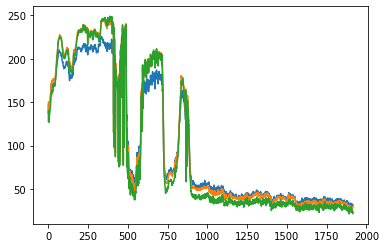

In [59]:
plt.plot(RGB_mean);

#### Unstable video
If the video is unstable, then no specific region of the image can be used to determine lick times. Instead, frames must be manually selected.

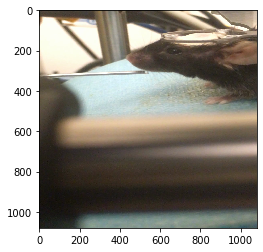

In [91]:
img = clip.get_frame(t=0.0)
plt.imshow(img);

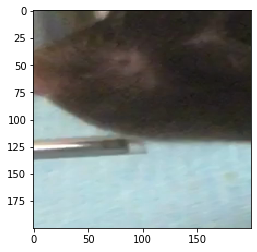

In [96]:
# Test cropping dimensions
t = 40.0
x1 = 350
x2 = 550
y1 = 200
y2 = 400
plt.imshow(clip.get_frame(t=t)[y1:y2, x1:x2])

In [97]:
#clip = mpy.video.fx.all.crop(clip, x1=x1, x2=x2, y1=y1, y2=y2)

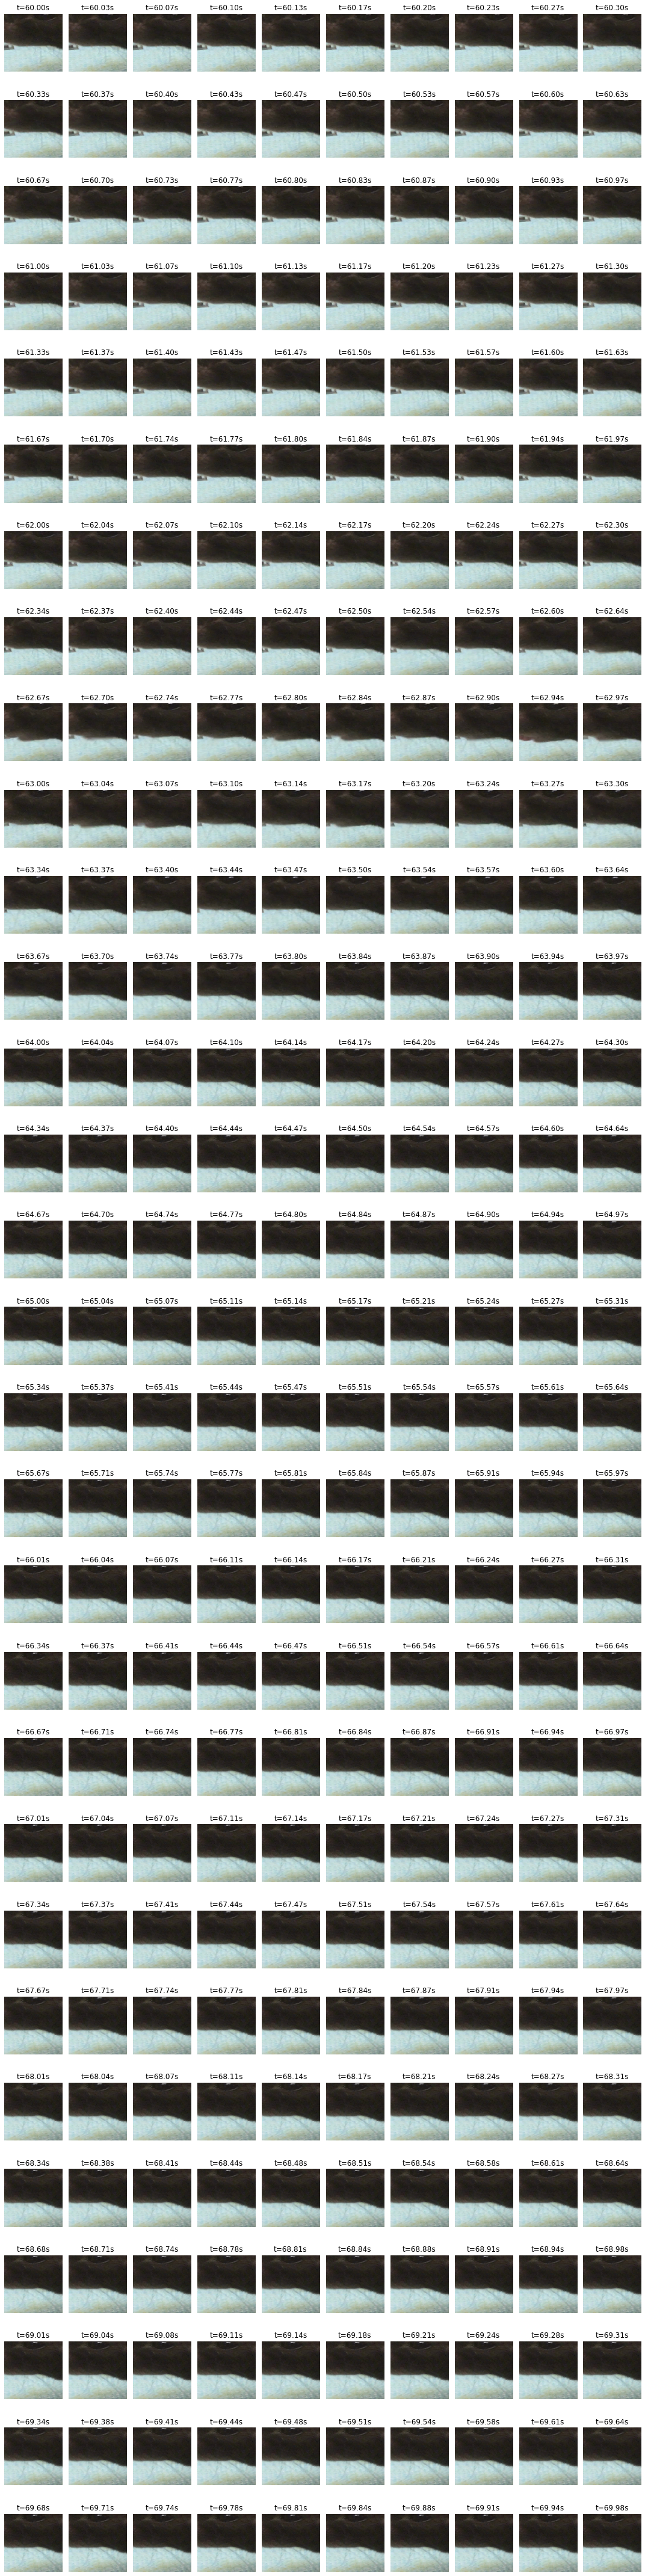

In [101]:
t1 = 60.0
t2 = 70.0

num_frames = round((t2-t1)*clip.fps)
cols = 10
rows = num_frames // cols + (num_frames % cols > 0)

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 2*rows))

for i, frame in enumerate(clip.subclip(t1, t2).iter_frames(with_times=False)):
    t = t1 + i/clip.fps
    ax_ = ax[i//cols, i%cols]
    ax_.imshow(frame[y1:y2, x1:x2])
    ax_.set_title('t=%.2fs' % t)
    ax_.axis('off')
    
plt.tight_layout()

In [105]:
t_lick_video = np.array([12.50, 13.54, 13.67, 13.80, 14.04, 14.67, 14.80, 14.94, 15.07, 15.44, 
                        15.71, 15.87, 16.41, 18.24, 18.94, 19.24, 33.77, 34.17, 34.27, 34.97,
                        35.11, 36.84, 36.97, 37.14, 46.81, 47.11, 53.14, 53.27, 53.34, 53.47,
                        53.57, 53.67, 53.97, 54.10, 54.24, 54.37, 54.90, 62.94, 63.07])

#### Load sensor data

In [122]:
# Load data into numpy array
data_filepath = '../data/test_insulation_26-06-19.log'
data = np.loadtxt(data_filepath, dtype=np.float32)
fs = 30000 # sample rate

In [119]:
# Verify ASCII encoding/decoding
with open(data_filepath, 'rb') as f:
    print(f.read(20*2))
print(data[:20])

b'0\n0\n0\n3\n0\n0\n2\n3\n3\n0\n6\n2\n5\n1\n6\n1\n5\n2\n6\n6\n'
[0. 0. 0. 3. 0. 0. 2. 3. 3. 0. 6. 2. 5. 1. 6. 1. 5. 2. 6. 6.]


#### Plot traces

In [106]:
# Find sensor crossing thresholds
thresh = 200
gt = data > thresh
lt = data < thresh
is_lick = np.logical_and(gt, np.roll(lt, 1))
is_lick[0] = False
t_lick_sensor = np.argwhere(is_lick) / fs

Text(0, 0.5, 'sensor value (a.u.)')

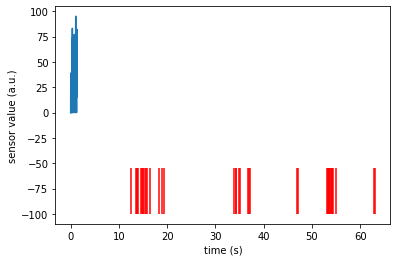

In [111]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(data))/fs, data)
ax.vlines(t_lick_sensor, ymin=-50.0, ymax=-5.0, color='g')
ax.vlines(t_lick_video, ymin=-100.0, ymax=-55.0, color='r')
#ax.set_ylim([-0.10*thresh, 3*thresh])
ax.set_xlabel('time (s)')
ax.set_ylabel('sensor value (a.u.)')

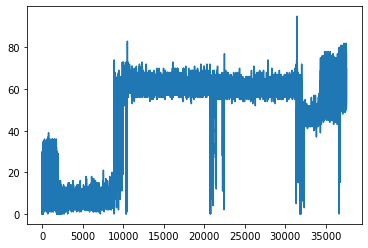

In [123]:
plt.plot(data)